## College Admission Probability Calculator

###### Problem --> Use classification technique for prediction of Graduate Admissions from an Indian perspective

### Context
- This dataset is created for prediction of Graduate Admissions from an Indian perspective.

### Content
- The dataset contains several parameters which are considered important during the application for Masters Programs.

### The parameters included are :

- GRE Scores ( out of 340 ) --> graduate program aptitude test 
- TOEFL Scores ( out of 120 ) --> Test of English as a Foreign Language
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline,make_pipeline
from lazypredict.Supervised import LazyClassifier


from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('Admission_Predict_Ver1.1.csv')
data=data.drop(['Serial No.'],axis=1)

In [4]:
data.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.50,4.50,9.65,1,0.92
1,324,107,4,4.00,4.50,8.87,1,0.76
2,316,104,3,3.00,3.50,8.00,1,0.72
3,322,110,3,3.50,2.50,8.67,1,0.80
4,314,103,2,2.00,3.00,8.21,0,0.65


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


- The given data is a pandas DataFrame named data with 500 rows and 8 columns. It contains attributes such as GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, and Chance of Admit. All columns have non-null values, and the data types include integers and floats. The DataFrame occupies approximately 31.4 kilobytes of memory.

In [6]:
data.duplicated().any()

False

- There are no duplicate rows in the DataFrame data. The output is False, indicating that there are no duplicate entries, and each row in the dataset is unique. 

In [7]:
data.isnull().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

- There are no missing values in any of the columns in the DataFrame data. Each column has a value of False, indicating the absence of any missing data.

In [8]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,316.47,107.19,3.11,3.37,3.48,8.58,0.56,0.72
std,11.30,6.08,1.14,0.99,0.93,0.60,0.50,0.14
min,290.00,92.00,1.00,1.00,1.00,6.80,0.00,0.34
25%,308.00,103.00,2.00,2.50,3.00,8.13,0.00,0.63
50%,317.00,107.00,3.00,3.50,3.50,8.56,1.00,0.72
75%,325.00,112.00,4.00,4.00,4.00,9.04,1.00,0.82
max,340.00,120.00,5.00,5.00,5.00,9.92,1.00,0.97


- The data.describe() output provides statistical summaries for each column in the DataFrame data. It includes count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values.
- it provides a quick overview of the central tendencies and spread of the data in the DataFrame, aiding in understanding the data distribution and characteristics.

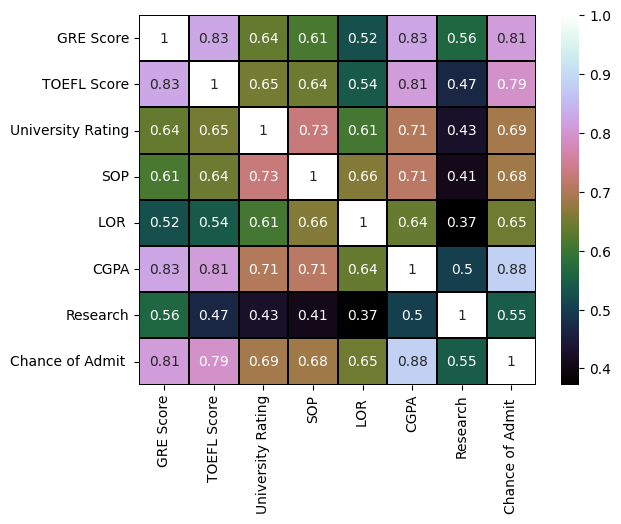

In [9]:
sns.heatmap(data.corr(),linecolor='k',annot=True,linewidths=0.25,vmax=1.0,cmap='cubehelix')
plt.show()

- The data.corr() output shows the correlation coefficients between different attributes in the DataFrame data.

## 
Key correlations:- 

Strong positive correlations: GRE Score with TOEFL Score (0.827) and CGPA (0.82- 6).
Strong positive correlations: TOEFL Score with GRE Score (0.827) and CGPA (0.8- 11).
Strong positive correlation: CGPA with Chance of Admit (0.- 882).
Other notable correlations are observed among the attributes University Rating, SOP, LOR, and Research with the Chance of A- dmit.

Correlation coefficients range from -1 to 1, with 1 indicating a perfect positive correlation. These correlations provide insights into the relationships between different attributes and are helpful for understanding potential patterns in the data.

In [10]:
data.skew()

GRE Score           -0.04
TOEFL Score          0.10
University Rating    0.09
SOP                 -0.23
LOR                 -0.15
CGPA                -0.03
Research            -0.24
Chance of Admit     -0.29
dtype: float64

- Skewness values closer to 0 indicate that the data distribution is closer to a symmetrical (normal) distribution. Negative skewness means the data is - skewed to the left, while positive skewness means the data is skewed to the right.
- 
The skewness information helps to identify the shape and symmetry of the data distribution for each attribute in the datas.t.

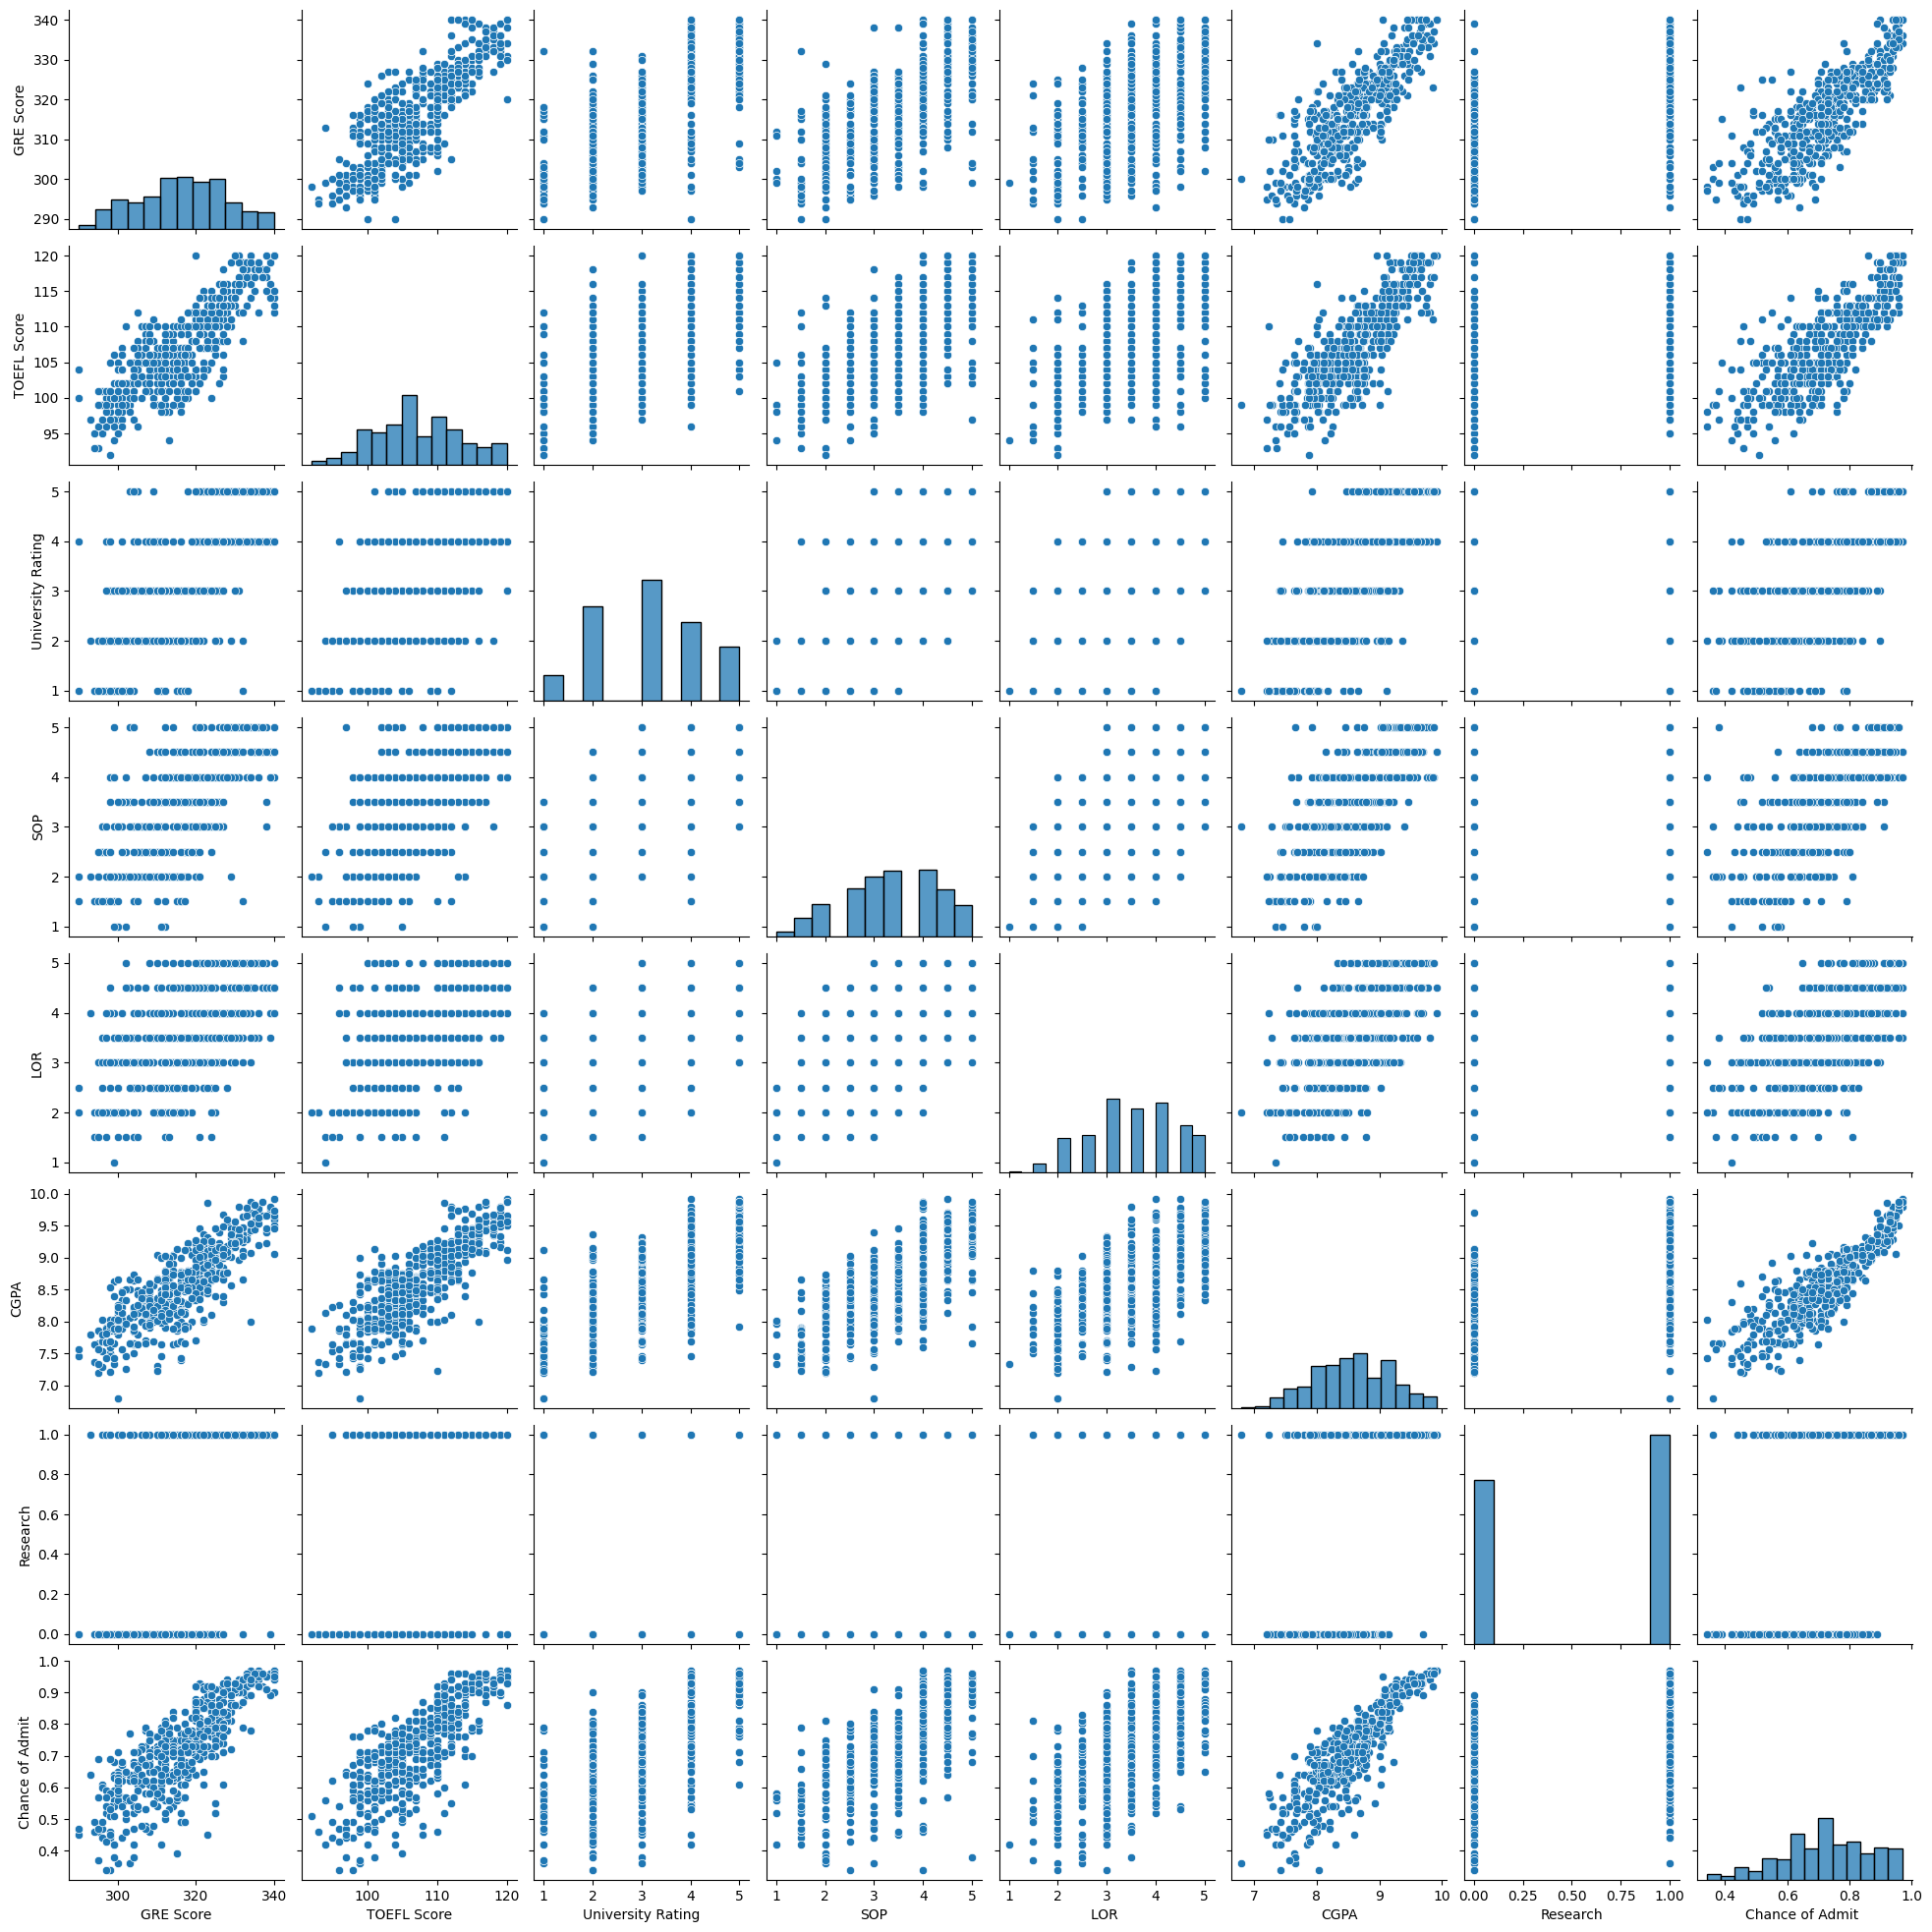

In [11]:
sns.pairplot(data=data )
plt.show()

- A pair plot is a graphical representation that shows the pairwise relationships and distributions between multiple Columns

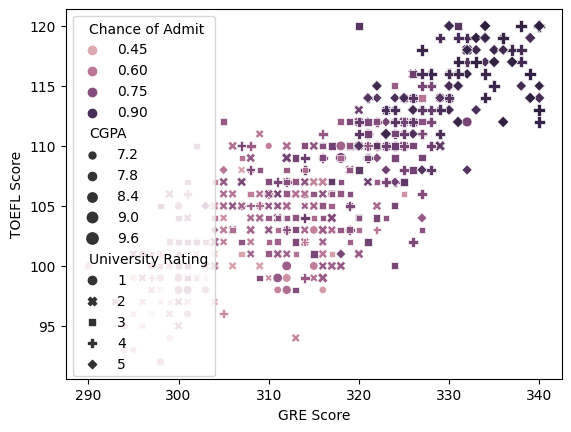

In [12]:
sns.scatterplot(x=data['GRE Score'],y=data['TOEFL Score'],hue=data['Chance of Admit '],style=data['University Rating'],size=data['CGPA'])
plt.show()

- It's giving the graphical representation of data points on a two-dimensional (GRE Score and TOEFL Score) . It uses individual data points, each represented by a dot or marker, to display the relationship between two numerical variables. 

In [13]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

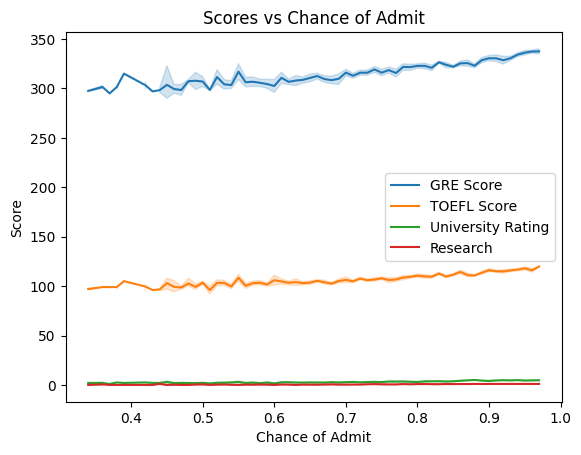

In [14]:

# Plot the first line with label 'GRE Score'
sns.lineplot(y=data['GRE Score'], x=data['Chance of Admit '], label='GRE Score')

# Plot the second line with label 'TOEFL Score'
sns.lineplot(y=data['TOEFL Score'], x=data['Chance of Admit '], label='TOEFL Score')

# Plot the third line with label 'University Rating'
sns.lineplot(y=data['University Rating'], x=data['Chance of Admit '], label='University Rating')

# Plot the fourth line with label 'Research'
sns.lineplot(y=data['Research'], x=data['Chance of Admit '], label='Research')

# Set the axis labels and title
plt.xlabel('Chance of Admit')
plt.ylabel('Score')
plt.title('Scores vs Chance of Admit')

# Add the legend to display labels
plt.legend()

# Show the plot
plt.show()


## Train_Test_Split

- The train-test split is a common practice used to evaluate the performance of a model. It involves splitting the dataset into two subsets: the training set and the testing set. The model is trained on the training set and then evaluated on the testing set to measure its performance on unseen data.

In [15]:
X=data.drop(['Chance of Admit '],axis=1)
y=data['Chance of Admit ']
print('x shape',X.shape)
print('y shape',y.shape)

x shape (500, 7)
y shape (500,)


In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,y , test_size=.3 , random_state=0)
print('x_train shape',x_train.shape)
print('x_test shape',x_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

x_train shape (350, 7)
x_test shape (150, 7)
y_train shape (350,)
y_test shape (150,)


- The provided code uses the train_test_split function from the scikit-learn library to split a given dataset into four subsets for machine learning tasks:

- X: The feature matrix containing input data.
- y: The target vector containing corresponding labels or target values.
- x_train: The training set of features, which constitutes 70% of the original data.
- x_test: The testing set of features, which constitutes 30% of the original data.
- y_train: The corresponding target values for the training set.
- y_test: The corresponding target values for the testing set.
- This split allows for the training of machine learning models on the x_train and y_train data, and then evaluating their performance on unseen data using x_test and comparing the predictions with y_test. The test_size parameter is set to 0.3, meaning 30% of the data is used for testing, and random_state ensures reproducibility of the data split.








In [17]:
# Step 5: Create and use LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

In [18]:
print("Mean Absolute Error (MAE)",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE)",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

Mean Absolute Error (MAE) 0.045347711042862775
Mean Squared Error (MSE) 0.0038128490869800517
R2 score 0.7910195074277856


- the model's performance is exceptional, as indicated by the extremely low error metrics (MAE and MSE) and a perfect R2 score of 0.79. This suggests that the model has learned the patterns in the data and can accurately predict the target variable. However, it's essential to ensure that these results are not due to overfitting or other issues, and cross-validation or other model evaluation techniques should be used to validate the model's performance on unseen data.

## Comparing Actual value Vs Predict Value

In [19]:
## y_test or y_pred convert into dataset
comparing=pd.DataFrame({"Actual":y_test,"Prediction":y_pred})
comparing.sample(10)

,Actual,Prediction
194,0.77,0.72
355,0.73,0.65
474,0.67,0.62
5,0.90,0.87
318,0.79,0.75
159,0.52,0.53
461,0.68,0.60
325,0.81,0.85
179,0.73,0.63
271,0.54,0.52


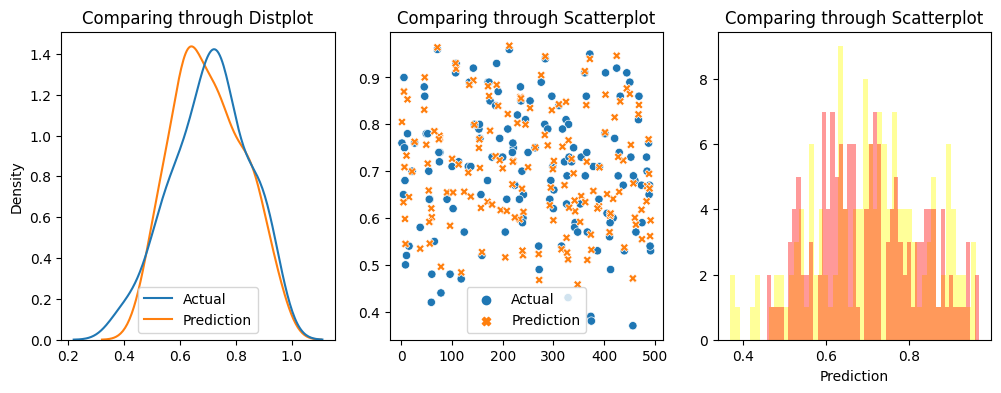

In [20]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(12,4))

ax1.set_title("Comparing through Distplot")
sns.kdeplot(data=comparing,ax=ax1)

ax2.set_title("Comparing through Scatterplot")
sns.scatterplot(data=comparing,ax=ax2)

ax3.set_title("Comparing through Scatterplot")
sns.distplot(comparing['Actual'], color='yellow',kde=False,bins=50,ax=ax3)
sns.distplot(comparing['Prediction'],color='red',kde=False,bins=50,ax=ax3)
plt.show()

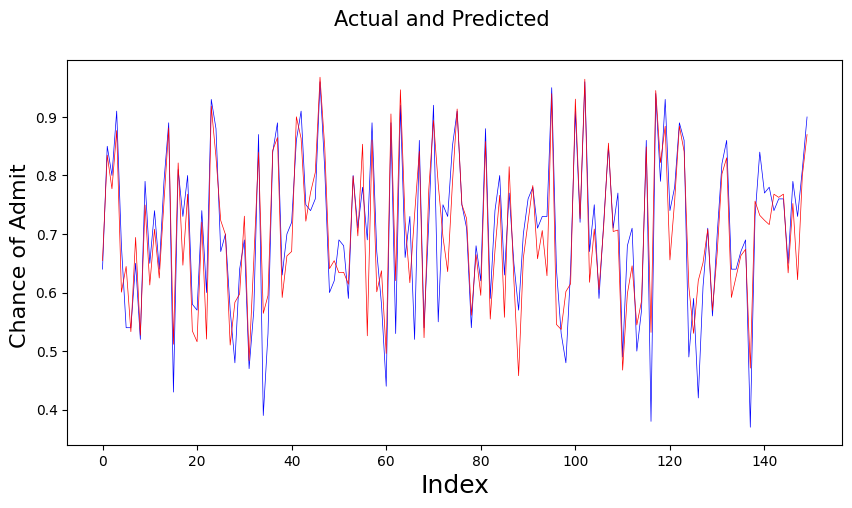

In [21]:
# Actual and Predicted
c = [i for i in range(150)] # generating index 
fig = plt.figure(figsize=(10,5))
plt.plot(c,y_test, color="blue", linewidth=0.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=0.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Chance of Admit ', fontsize=16) 
plt.legend
plt.show()

## Now you Can Predict by giving your data 

In [22]:
# Assuming you have already trained the model and stored it in 'LR'

# Function to get user inputs
def get_user_inputs():
    GRE = float(input("Enter your GRE Score (out of 340): "))
    TOEFL = float(input("Enter your TOEFL Score (out of 120): "))
    UR = float(input("Enter your University Rating (out of 5): "))
    SOP = float(input("Enter your Statement of Purpose Score (out of 5): "))
    LOR = float(input("Enter your Letter of Recommendation Strength Score (out of 5): "))
    CGPA = float(input("Enter your CGPA (out of 10): "))
    Research = int(input("Have you any Research Experience? Enter 1 for Yes, 0 for No: "))
    
    # Return the user inputs as a numpy array
    return np.array([[GRE, TOEFL, UR, SOP, LOR, CGPA, Research]])

# Get user inputs
user_input = get_user_inputs()

# Make prediction using the model
prediction = LR.predict(user_input)

# Round the prediction to two decimal places
rounded_prediction = round(prediction[0], 2)

# Display the prediction
def print_rectangular_with_text_centered(text):
    # Calculate the length of the text
    text_length = len(text)

    # Calculate the width of the rectangular box
    box_width = max(text_length + 4, 10)  # Minimum box width is 10 to accommodate the text

    # Calculate the number of spaces needed to center the text
    spaces_before_text = (box_width - text_length) // 2

    # Print the rectangular box with the text centered
    print("*" * box_width)
    print("*" + " " * spaces_before_text + text + " " * (box_width - text_length - spaces_before_text) + "*")
    print("*" * box_width)

# Chances of Admission
chances_of_admission = str(rounded_prediction)
admission_text = "Your Admission Status Chances: " + chances_of_admission + "%"

# Print the rectangular box with the admission text centered
print("\n")
print("\n")
print_rectangular_with_text_centered(admission_text)


Enter your GRE Score (out of 340):  337
Enter your TOEFL Score (out of 120):  118
Enter your University Rating (out of 5):  4
Enter your Statement of Purpose Score (out of 5):  4.5
Enter your Letter of Recommendation Strength Score (out of 5):  4.5
Enter your CGPA (out of 10):  9.65
Have you any Research Experience? Enter 1 for Yes, 0 for No:  1






****************************************
*  Your Admission Status Chances: 0.95%  *
****************************************
